# import neccesary libraries and dependencies

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# load and read the data

In [2]:
data = pd.read_csv("Test.csv")

In [3]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


# Analysing the data

In [4]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [5]:
data.shape

(2627, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [7]:
data.isna().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,2154.000000,2154.000000,2154.000000,2154.000000
mean,463496.744661,43.461467,2.551532,2.837047
std,2591.465156,16.761895,3.344917,1.566872
min,458989.000000,18.000000,0.000000,1.000000
25%,461282.250000,30.000000,0.000000,2.000000
50%,463535.000000,41.000000,1.000000,2.000000
75%,465705.750000,52.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


# checking missing and duplicated data

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2154 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2154 non-null   int64  
 1   Gender           2154 non-null   object 
 2   Ever_Married     2154 non-null   object 
 3   Age              2154 non-null   int64  
 4   Graduated        2154 non-null   object 
 5   Profession       2154 non-null   object 
 6   Work_Experience  2154 non-null   float64
 7   Spending_Score   2154 non-null   object 
 8   Family_Size      2154 non-null   float64
 9   Var_1            2154 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 185.1+ KB


In [11]:
data.shape


(2154, 10)

In [12]:
data.duplicated().sum()

0

In [13]:
# NO missing or duplicated data

# anlysing unique columns

In [14]:
data.nunique()

ID                 2154
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
dtype: int64

# Data exploration

In [15]:
#Box plot for the total amount spent on all products (MntTotal)
#Outliers
#Box plot and histogram for prchase ammount 
#Histogram for age
#Correlation matrix
#Point-Biserial correlations for binary variables

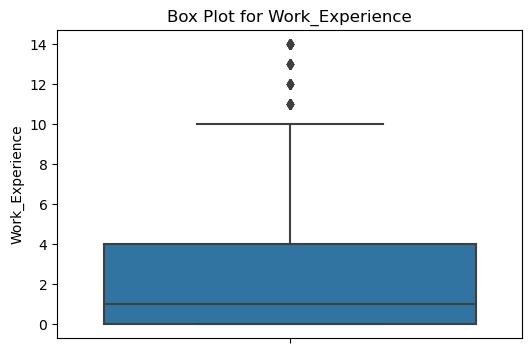

In [16]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data = data, y='Work_Experience')
plt.title('Box Plot for Work_Experience')
plt.ylabel('Work_Experience')
plt.show()

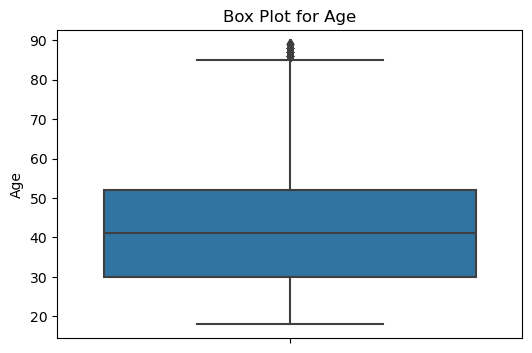

In [17]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data = data, y='Age')
plt.title('Box Plot for Age')
plt.ylabel('Age')
plt.show()

# treating Outliers

In [18]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
outliers.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
19,459045,Female,Yes,88,Yes,Lawyer,1.0,Average,4.0,Cat_6
30,459080,Male,Yes,89,No,Lawyer,1.0,Low,2.0,Cat_6
44,459123,Female,Yes,86,No,Artist,1.0,High,2.0,Cat_6
67,459194,Female,Yes,89,Yes,Lawyer,0.0,High,2.0,Cat_6
109,459344,Female,Yes,88,Yes,Artist,1.0,High,2.0,Cat_6


In [19]:
data = data[(data['Age'] > lower_bound) & (data['Age'] < upper_bound)]
data.describe()

,ID,Age,Work_Experience,Family_Size
count,2105.000000,2105.000000,2105.000000,2105.000000
mean,463496.726841,42.452732,2.585273,2.862233
std,2582.115100,15.579240,3.366898,1.573009
min,458989.000000,18.000000,0.000000,1.000000
25%,461299.000000,30.000000,0.000000,2.000000
50%,463516.000000,40.000000,1.000000,3.000000
75%,465704.000000,51.000000,4.000000,4.000000
max,467968.000000,84.000000,14.000000,9.000000


In [20]:
Q1 = data['Work_Experience'].quantile(0.25)
Q3 = data['Work_Experience'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Work_Experience'] < lower_bound) | (data['Work_Experience'] > upper_bound)]
outliers.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
35,459100,Female,No,61,Yes,Artist,11.0,Low,1.0,Cat_6
182,459538,Female,No,49,Yes,Homemaker,13.0,Low,1.0,Cat_6
188,459566,Female,Yes,37,Yes,Artist,13.0,Low,2.0,Cat_6
297,459968,Male,No,38,Yes,Artist,13.0,Low,1.0,Cat_7


In [21]:
data = data[(data['Work_Experience'] > lower_bound) & (data['Work_Experience'] < upper_bound)]
data.describe()

,ID,Age,Work_Experience,Family_Size
count,2040.000000,2040.000000,2040.000000,2040.000000
mean,463512.539216,42.613725,2.278431,2.877451
std,2578.003541,15.692728,2.928430,1.560511
min,458989.000000,18.000000,0.000000,1.000000
25%,461325.500000,30.000000,0.000000,2.000000
50%,463551.500000,41.000000,1.000000,3.000000
75%,465725.500000,52.000000,4.000000,4.000000
max,467968.000000,84.000000,9.000000,9.000000


# histogram for age

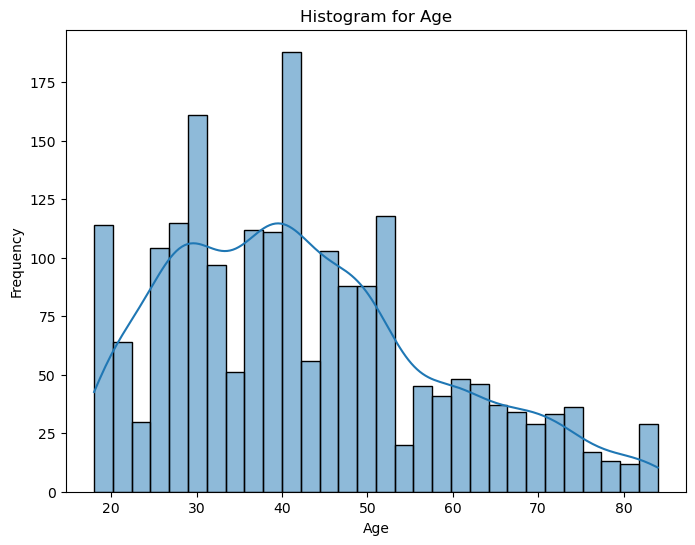

In [22]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [23]:
print("Skewness: %f" % data['Age'].skew())
print("Kurtosis: %f" % data['Age'].kurt())

Skewness: 0.584159
Kurtosis: -0.318262


# Mapping the data

In [24]:
columns_to_map = ['Graduated', 'Ever_Married']
for column in columns_to_map:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# Display the modified DataFrame
print(data)

          ID  Gender  Ever_Married  Age  Graduated     Profession  \
0     458989  Female             1   36          1       Engineer   
1     458994    Male             1   37          1     Healthcare   
5     459003    Male             1   47          1         Doctor   
6     459005    Male             1   61          1         Doctor   
7     459008  Female             1   47          1         Artist   
...      ...     ...           ...  ...        ...            ...   
2621  467950  Female             0   35          1  Entertainment   
2622  467954    Male             0   29          0     Healthcare   
2623  467958  Female             0   35          1         Doctor   
2625  467961    Male             1   47          1      Executive   
2626  467968  Female             0   43          1     Healthcare   

      Work_Experience Spending_Score  Family_Size  Var_1  
0                 0.0            Low          1.0  Cat_6  
1                 8.0        Average          4.0  Ca

In [25]:
data.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,1,36,1,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,1,37,1,Healthcare,8.0,Average,4.0,Cat_6
5,459003,Male,1,47,1,Doctor,0.0,High,5.0,Cat_4
6,459005,Male,1,61,1,Doctor,5.0,Low,3.0,Cat_6
7,459008,Female,1,47,1,Artist,1.0,Average,3.0,Cat_6
8,459013,Male,1,50,1,Artist,2.0,Average,4.0,Cat_6
9,459014,Male,0,19,0,Healthcare,0.0,Low,4.0,Cat_6
10,459015,Male,0,22,0,Healthcare,0.0,Low,3.0,Cat_6
11,459016,Female,0,22,0,Healthcare,0.0,Low,6.0,Cat_6
12,459024,Male,1,50,1,Artist,1.0,Average,5.0,Cat_6


# k means clustering

In [26]:
from sklearn.cluster import KMeans

# Standardising data

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Age','Work_Experience', 'Family_Size']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Age,Work_Experience,Family_Size
count,2.040000e+03,2.040000e+03,2.040000e+03
mean,-1.906971e-16,4.527968e-17,-5.224579e-18
std,1.000245e+00,1.000245e+00,1.000245e+00
min,-1.568864e+00,-7.782294e-01,-1.203395e+00
25%,-8.039914e-01,-7.782294e-01,-5.624222e-01
50%,-1.028579e-01,-4.366657e-01,7.855059e-02
75%,5.982756e-01,5.880253e-01,7.195234e-01
max,2.637937e+00,2.295844e+00,3.924387e+00


# Principal Component Analysis (PCA)

In [35]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

# Elbow method

In [36]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

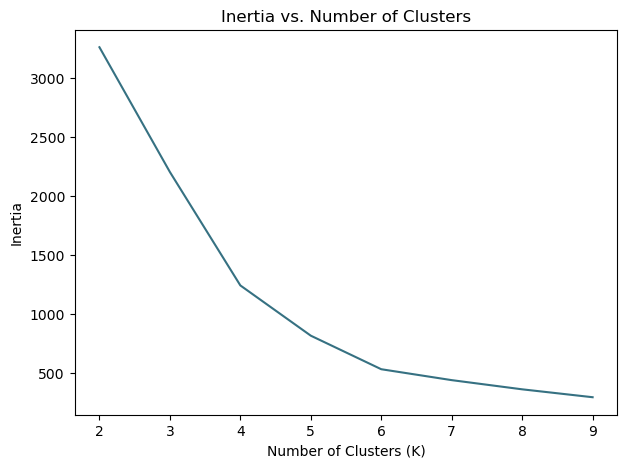

In [30]:

plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Silhouette score analysis

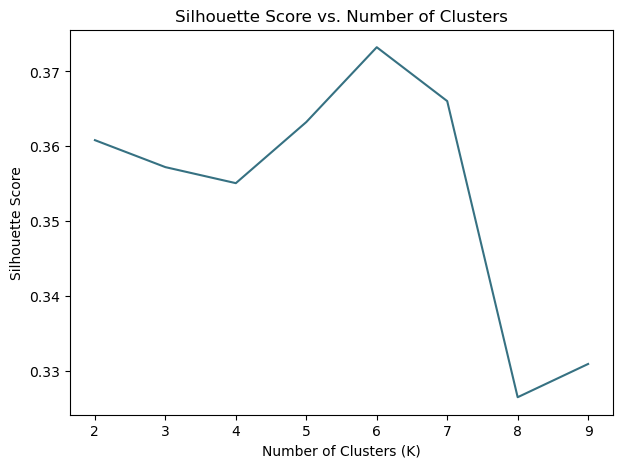

In [37]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [38]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

# Visualisation of clusters

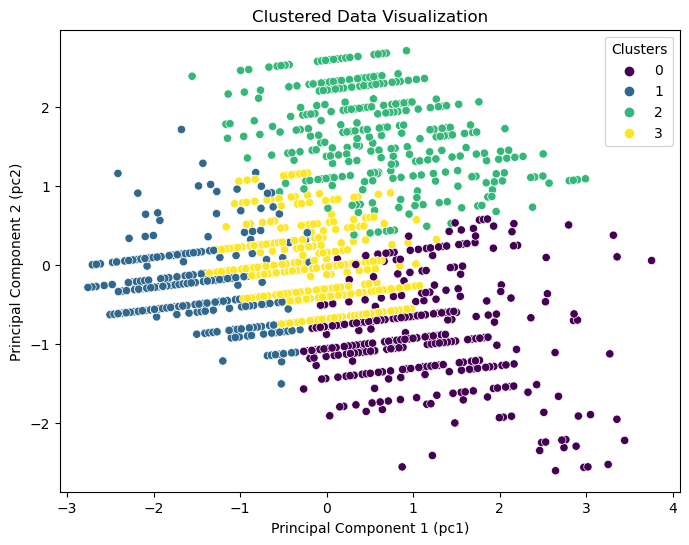

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [40]:
data['Cluster'] = data_scaled.Cluster
data.groupby('Cluster')[cols_for_clustering].mean()

,Age,Work_Experience,Family_Size
Cluster,,,
0,34.944656,1.211832,4.858779
1,65.836830,0.848485,2.163170
2,37.099490,7.630102,2.446429
3,37.171223,0.946763,2.067626


# Cluster sizes

Text(0, 0.5, 'Cluster')

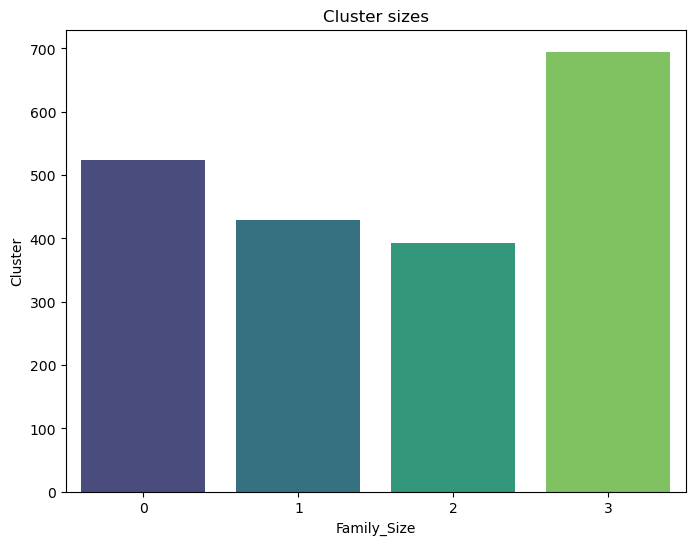

In [45]:
cluster_sizes = data.groupby('Cluster')[['Family_Size']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='Family_Size', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Family_Size')
plt.ylabel('Cluster')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


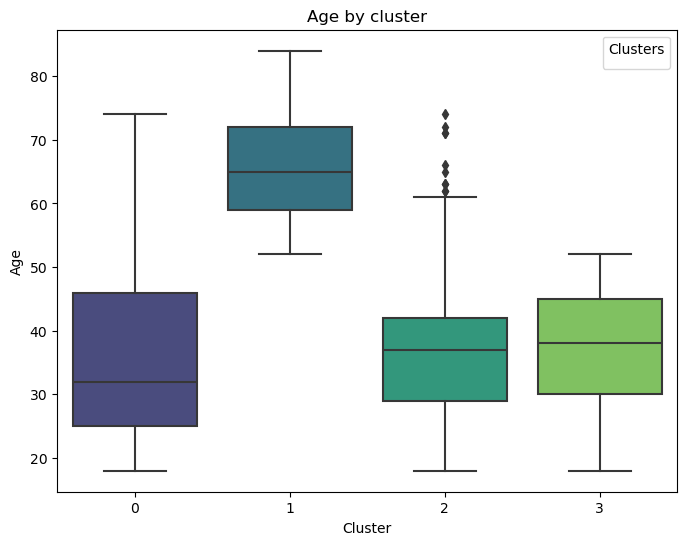

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Age', data=data, palette='viridis')
plt.title('Age by cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.legend(title='Clusters')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


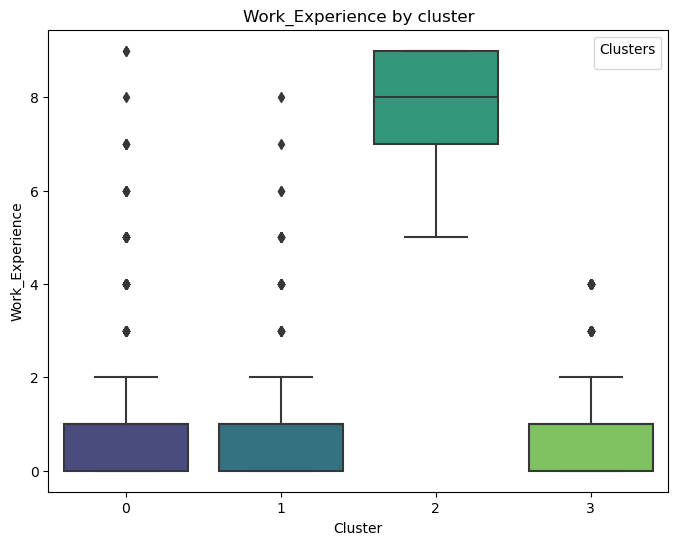

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Work_Experience', data=data, palette='viridis')
plt.title('Work_Experience by cluster')
plt.xlabel('Cluster')
plt.ylabel('Work_Experience')
plt.legend(title='Clusters')